#Importações


In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e modelagem
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Modelos de regressão
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Balanceamento de dados
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# Configurações adicionais
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#Exploração dos Dados

In [4]:
# Carregar o dataset
df = pd.read_csv('data_set.csv')

# Visualizar as primeiras linhas
df.head()


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [5]:
# Dimensões do dataset
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')


O dataset possui 41762 linhas e 26 colunas.


In [6]:
# Informações sobre o dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16  HAS_FAM_INCOME     417

In [7]:
# Verificar estatísticas descritivas
df.describe()


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
count,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,...,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000
mean,0.980221,1.068890,0.714789,1.040683,0.648700,1.810474,0.918299,0.164911,0.960251,2.380657,...,0.251449,4.459892,0.504621,3.269527,0.985393,1.072003,1.219913,0.720152,1.851755,25.191729
std,0.139241,0.353034,0.931219,0.331452,0.573161,1.676994,0.412945,0.475779,0.499563,2.284152,...,0.433851,1.732288,0.624362,0.983791,0.588661,0.494758,1.225242,0.936227,1.160388,4.561691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,25.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,2.000000,25.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.000000,...,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.000000,25.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,9.000000,2.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,51.000000


#Pré-Processamento

In [8]:
# Verificar valores ausentes
df.isnull().sum()


,0
VDRL_RESULT,0
CONS_ALCOHOL,0
RH_FACTOR,0
SMOKER,0
PLAN_PREGNANCY,0
BLOOD_GROUP,0
HAS_PREG_RISK,0
TET_VACCINE,0
IS_HEAD_FAMILY,0
MARITAL_STATUS,0


In [9]:
# Porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]) * 100


,0
VDRL_RESULT,0.0
CONS_ALCOHOL,0.0
RH_FACTOR,0.0
SMOKER,0.0
PLAN_PREGNANCY,0.0
BLOOD_GROUP,0.0
HAS_PREG_RISK,0.0
TET_VACCINE,0.0
IS_HEAD_FAMILY,0.0
MARITAL_STATUS,0.0


In [10]:
# Aplicar One-Hot Encoding nas variáveis categóricas
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [11]:
# Distribuição das classes
df['VDRL_RESULT'].value_counts()


,count
VDRL_RESULT,
1.0,40936
0.0,826


In [12]:
# Separar features e target
X = df_encoded.drop('VDRL_RESULT', axis=1)
y = df_encoded['VDRL_RESULT']

# Aplicar o SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


#Análise Exploratória


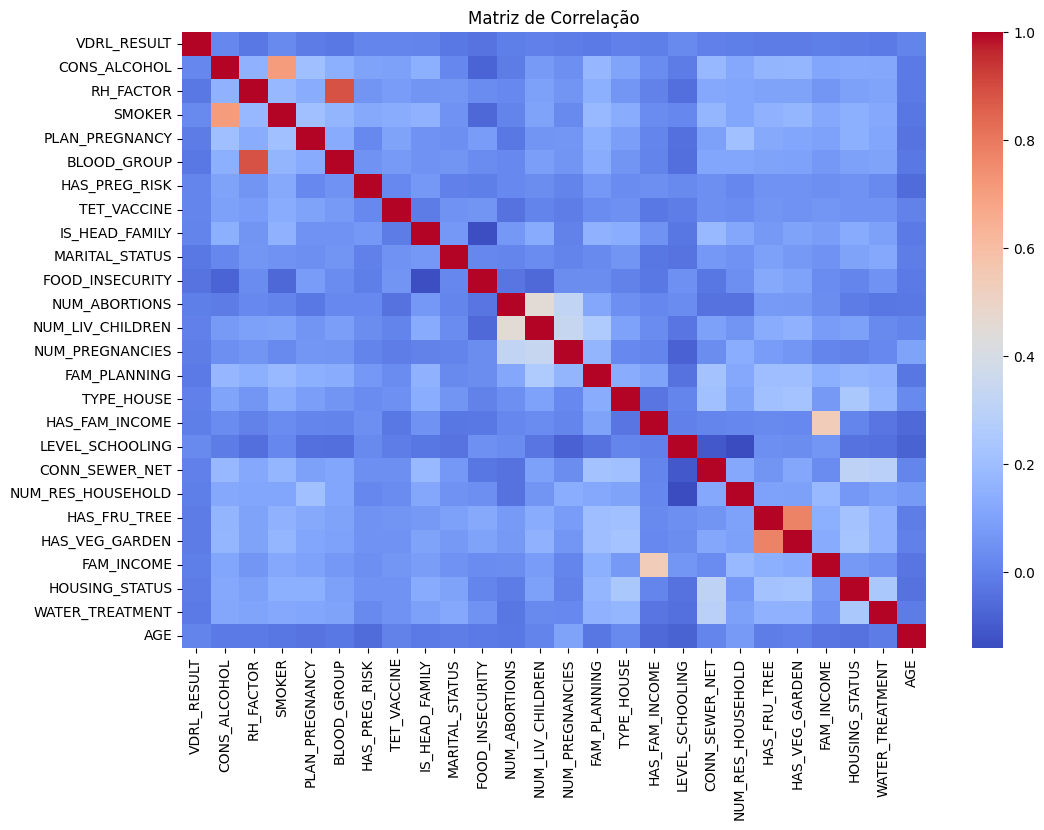

In [13]:
# Matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


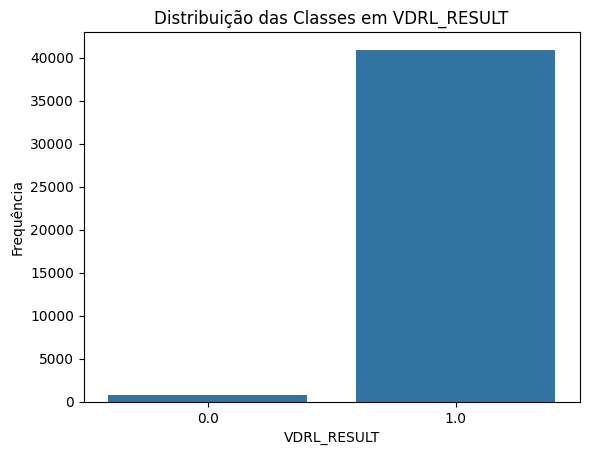

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='VDRL_RESULT', data=df)
plt.title('Distribuição das Classes em VDRL_RESULT')
plt.xlabel('VDRL_RESULT')
plt.ylabel('Frequência')
plt.savefig('class_distribution.png')
plt.show()
plt.close()


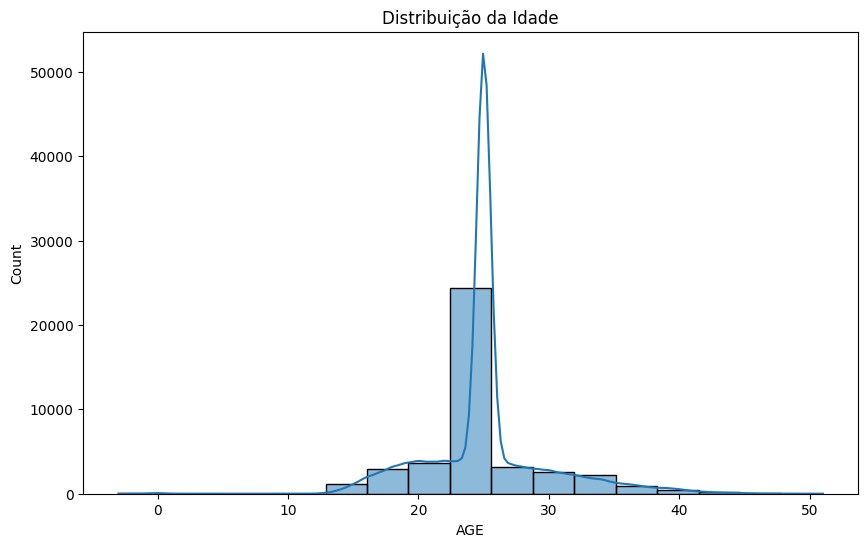

In [15]:
# Distribuição da idade
plt.figure(figsize=(10,6))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribuição da Idade')
plt.show()


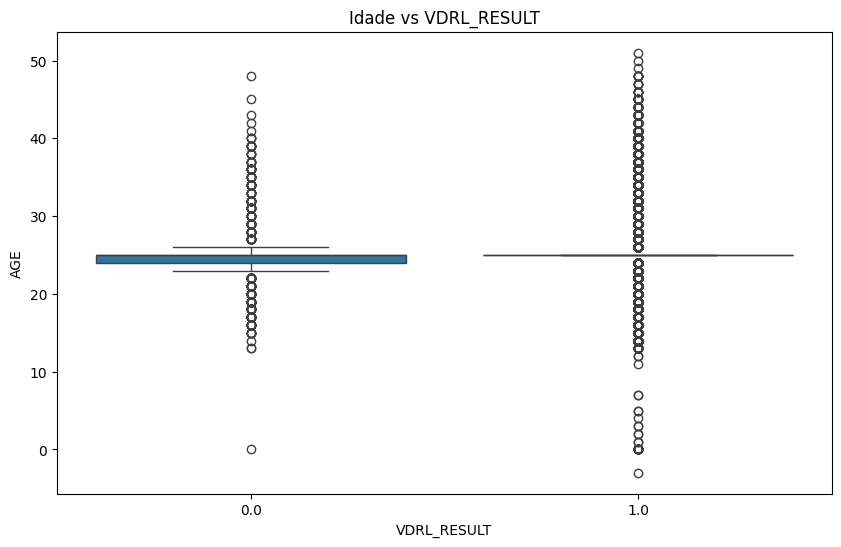

In [16]:
# Relação entre idade e resultado do VDRL
plt.figure(figsize=(10,6))
sns.boxplot(x='VDRL_RESULT', y='AGE', data=df)
plt.title('Idade vs VDRL_RESULT')
plt.show()


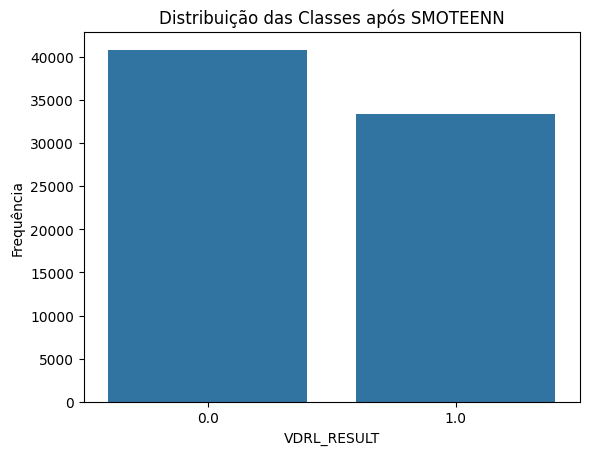

In [24]:
sns.countplot(x=y_resampled)
plt.title('Distribuição das Classes após SMOTEENN')
plt.xlabel('VDRL_RESULT')
plt.ylabel('Frequência')
plt.savefig('balanced_class_distribution.png')
plt.show()
plt.close()


#Modelos de Classificação

In [17]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [25]:
import time

# Ajuste de parâmetros para reduzir o tempo de execução
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42),
    'SVM (Linear Kernel)': SVC(kernel='linear', probability=True, max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
}


# DataFrame para armazenar resultados
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Avaliação dos modelos
for model_name, model in models.items():
    print(f"Treinando e avaliando o modelo: {model_name}")
    start_time = time.time()

    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_test)

    # Probabilidades para cálculo do ROC AUC
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:,1]
    elif hasattr(model, 'decision_function'):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    # Cálculo das métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Adicionando os resultados
    results = pd.concat([results, pd.DataFrame([{
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc
        }])], ignore_index=True)

    end_time = time.time()
    print(f"Tempo de execução para {model_name}: {end_time - start_time:.2f} segundos\n")

# Exibindo os resultados
print("Resultados dos modelos:")
display(results)


Treinando e avaliando o modelo: Logistic Regression
Tempo de execução para Logistic Regression: 3.37 segundos

Treinando e avaliando o modelo: Decision Tree
Tempo de execução para Decision Tree: 0.64 segundos

Treinando e avaliando o modelo: Random Forest
Tempo de execução para Random Forest: 4.42 segundos

Treinando e avaliando o modelo: Gradient Boosting
Tempo de execução para Gradient Boosting: 12.62 segundos

Treinando e avaliando o modelo: XGBoost
Tempo de execução para XGBoost: 0.80 segundos

Treinando e avaliando o modelo: SVM (Linear Kernel)
Tempo de execução para SVM (Linear Kernel): 22.33 segundos

Treinando e avaliando o modelo: KNN
Tempo de execução para KNN: 14.59 segundos

Resultados dos modelos:


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.644205,0.642143,0.644205,0.638265,0.682045
1,Decision Tree,0.974191,0.974207,0.974191,0.974179,0.973465
2,Random Forest,0.989151,0.989407,0.989151,0.989162,0.996968
3,Gradient Boosting,0.967655,0.969094,0.967655,0.967718,0.989024
4,XGBoost,0.987803,0.988125,0.987803,0.987817,0.994609
5,SVM (Linear Kernel),0.489218,0.520597,0.489218,0.464088,0.524296
6,KNN,0.981806,0.982370,0.981806,0.981767,0.996109


In [26]:
# Exibir os resultados
results.set_index('Model', inplace=True)
results


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
Logistic Regression,0.644205,0.642143,0.644205,0.638265,0.682045
Decision Tree,0.974191,0.974207,0.974191,0.974179,0.973465
Random Forest,0.989151,0.989407,0.989151,0.989162,0.996968
Gradient Boosting,0.967655,0.969094,0.967655,0.967718,0.989024
XGBoost,0.987803,0.988125,0.987803,0.987817,0.994609
SVM (Linear Kernel),0.489218,0.520597,0.489218,0.464088,0.524296
KNN,0.981806,0.982370,0.981806,0.981767,0.996109


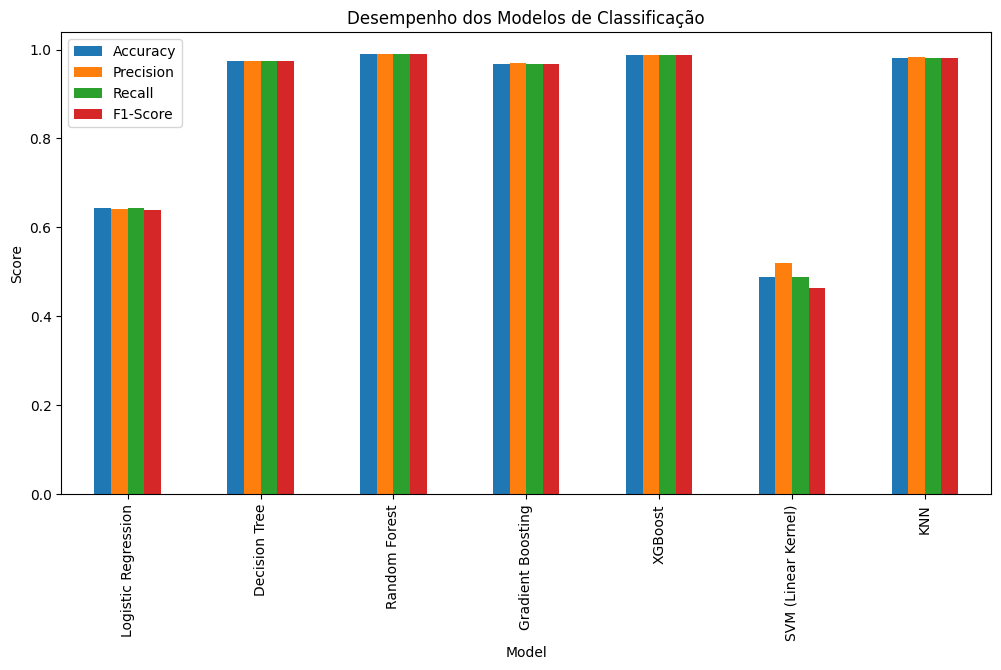

In [27]:
# Plotar métricas de desempenho
results[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12,6))
plt.title('Desempenho dos Modelos de Classificação')
plt.ylabel('Score')
plt.show()


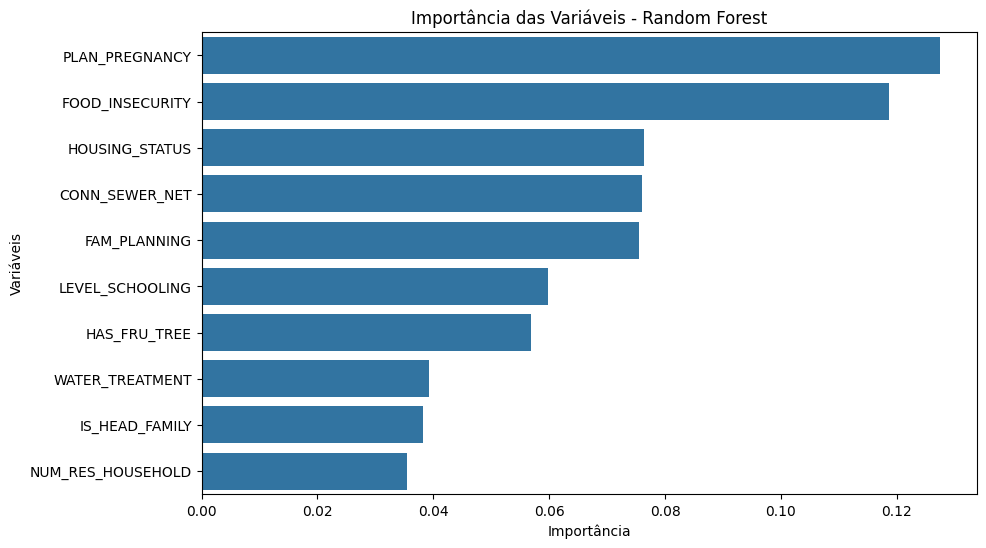

In [28]:
# Importância das variáveis no Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotar as 10 variáveis mais importantes
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()


#Modelos de Regressão


In [29]:
# Remover registros com AGE inválido
df_reg = df[df['AGE'] > 0]

# Separar features e target
X_reg = df_reg.drop('AGE', axis=1)
y_reg = df_reg['AGE']

# Dividir os dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [30]:
# Dicionário de modelos
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'LightGBM Regressor': LGBMRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
}

In [31]:
# Lista para armazenar os resultados
results_reg_list = []

# Avaliação dos modelos
for model_name, model in regressors.items():
    print(f"Treinando e avaliando o modelo: {model_name}")
    start_time = time.time()

    # Treinamento do modelo
    model.fit(X_train_reg, y_train_reg)

    # Previsões
    y_pred_reg = model.predict(X_test_reg)

    # Cálculo das métricas
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
    r2 = r2_score(y_test_reg, y_pred_reg)

    # Armazenar os resultados na lista
    results_reg_list.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

    end_time = time.time()
    print(f"Tempo de execução para {model_name}: {end_time - start_time:.2f} segundos\n")

# Converter a lista de resultados em um DataFrame
results_reg = pd.DataFrame(results_reg_list)

# Exibindo os resultados
print("Resultados dos modelos de regressão:")
display(results_reg)

Treinando e avaliando o modelo: Linear Regression
Tempo de execução para Linear Regression: 0.06 segundos

Treinando e avaliando o modelo: Ridge Regression
Tempo de execução para Ridge Regression: 0.03 segundos

Treinando e avaliando o modelo: Random Forest Regressor
Tempo de execução para Random Forest Regressor: 6.43 segundos

Treinando e avaliando o modelo: Gradient Boosting Regressor
Tempo de execução para Gradient Boosting Regressor: 1.83 segundos

Treinando e avaliando o modelo: AdaBoost Regressor
Tempo de execução para AdaBoost Regressor: 2.38 segundos

Treinando e avaliando o modelo: XGBoost Regressor
Tempo de execução para XGBoost Regressor: 0.71 segundos

Treinando e avaliando o modelo: LightGBM Regressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.204876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info

,Model,MAE,RMSE,R2
0,Linear Regression,2.869040,4.413516,0.035497
1,Ridge Regression,2.869026,4.413516,0.035497
2,Random Forest Regressor,2.868961,4.062000,0.183015
3,Gradient Boosting Regressor,2.829128,4.144237,0.149600
4,AdaBoost Regressor,3.272035,4.488923,0.002257
5,XGBoost Regressor,2.872881,4.058112,0.184578
6,LightGBM Regressor,2.825826,4.080238,0.175662
7,SVR,2.605583,4.426254,0.029921
8,KNN Regressor,3.181324,4.607804,-0.051289


In [32]:
# Exibir os resultados
results_reg.set_index('Model', inplace=True)
results_reg


,MAE,RMSE,R2
Model,,,
Linear Regression,2.869040,4.413516,0.035497
Ridge Regression,2.869026,4.413516,0.035497
Random Forest Regressor,2.868961,4.062000,0.183015
Gradient Boosting Regressor,2.829128,4.144237,0.149600
AdaBoost Regressor,3.272035,4.488923,0.002257
XGBoost Regressor,2.872881,4.058112,0.184578
LightGBM Regressor,2.825826,4.080238,0.175662
SVR,2.605583,4.426254,0.029921
KNN Regressor,3.181324,4.607804,-0.051289


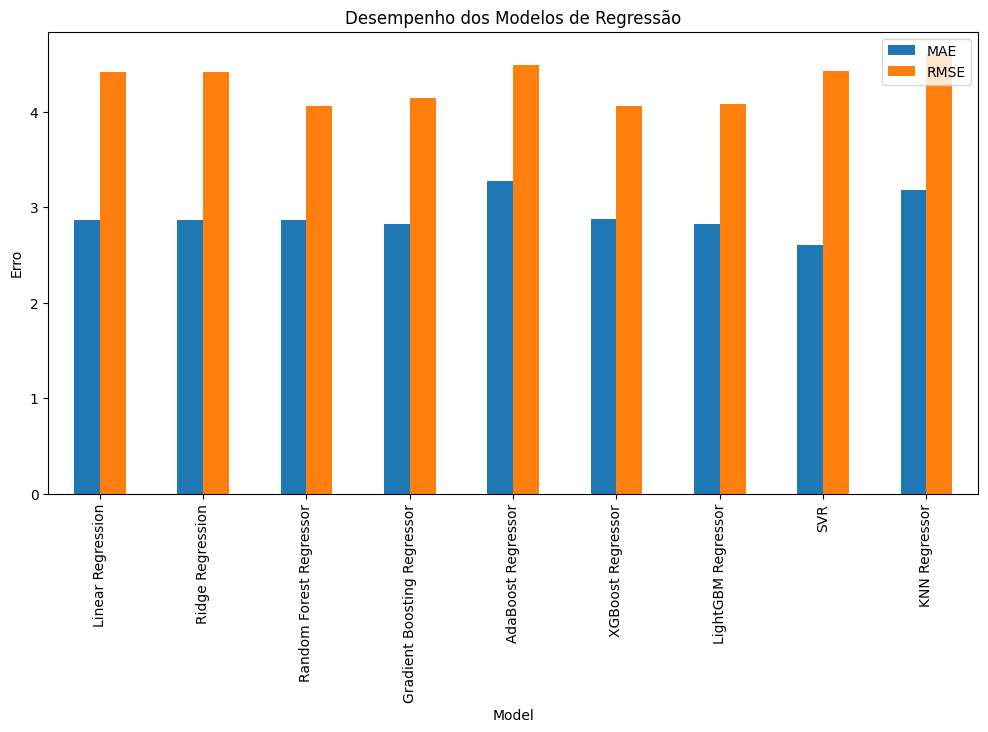

In [33]:
# Plotar métricas de desempenho
results_reg[['MAE', 'RMSE']].plot(kind='bar', figsize=(12,6))
plt.title('Desempenho dos Modelos de Regressão')
plt.ylabel('Erro')
plt.show()


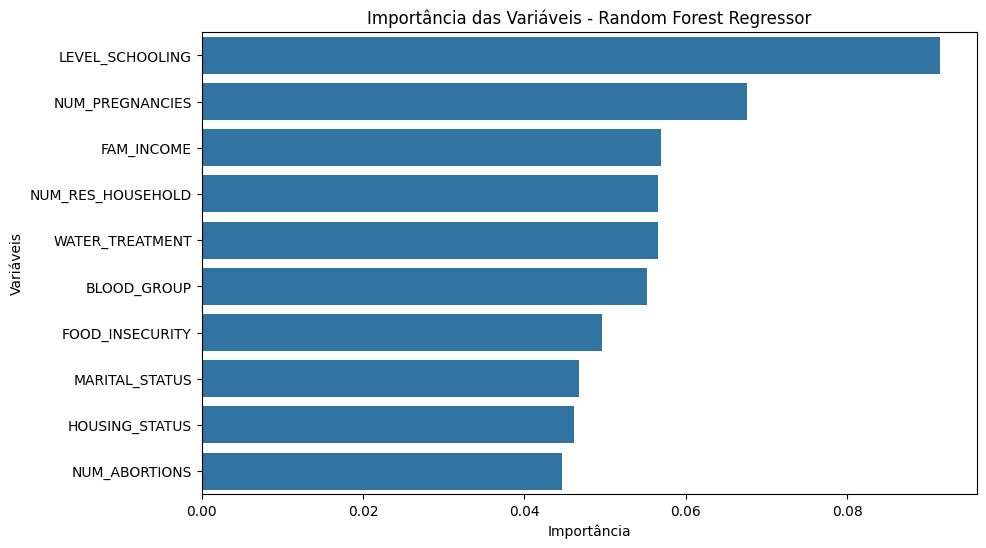

In [34]:
# Importância das variáveis no Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
importances_reg = rf_regressor.feature_importances_
feature_names_reg = X_train_reg.columns
feature_importance_reg = pd.Series(importances_reg, index=feature_names_reg).sort_values(ascending=False)

# Plotar as 10 variáveis mais importantes
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_reg[:10], y=feature_importance_reg.index[:10])
plt.title('Importância das Variáveis - Random Forest Regressor')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()
